<h1> Part 1: Setup and Data Loading </h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('datasets\\Data Science Salary 2021 to 2023.csv')

In [4]:
print("First 5 rows of the datasets:")
print(df.head())

First 5 rows of the datasets:
   work_year experience_level employment_type                job_title  \
0       2023               EN              FT        Applied Scientist   
1       2023               EN              FT        Applied Scientist   
2       2023               EN              FT     Data Quality Analyst   
3       2023               EN              FT  Compliance Data Analyst   
4       2023               EN              FT        Applied Scientist   

   salary salary_currency  salary_in_usd company_location company_size  
0  213660             USD         213660               US            L  
1  130760             USD         130760               US            L  
2  100000             USD         100000               NG            L  
3   30000             USD          30000               NG            L  
4  204620             USD         204620               US            L  


In [5]:
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


<h1>Part 2: Exploratory Data Analysis </h1>

<h1> Q1. How many unique job titles are there?</h1>

1. Number of unique job titles: 93

2. Average salary per work year (USD):
   work_year  salary_in_usd
0       2020   92302.631579
1       2021   94087.208696
2       2022  133379.510804
3       2023  148954.558413


C:\Users\Acer\AppData\Local\Temp\ipykernel_8896\2801114834.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='experience_level', y='salary_in_usd', data=avg_salary_by_level, order=level_order, palette='viridis')


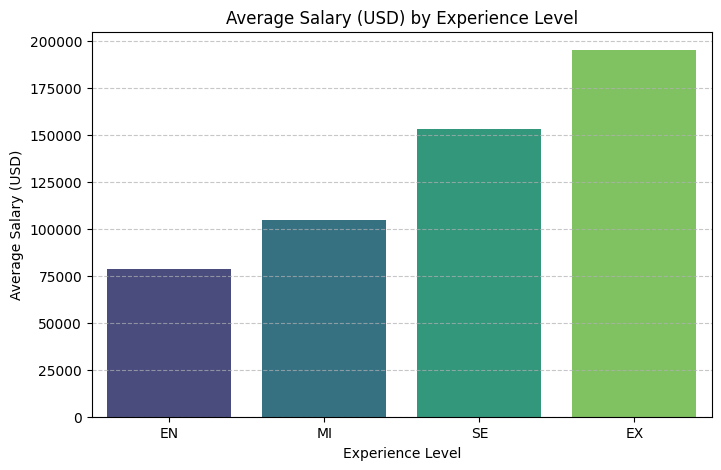


LabelEncoder mapping check:
Original Level: EN, Encoded Value: 0
Original Level: EX, Encoded Value: 1
Original Level: MI, Encoded Value: 2
Original Level: SE, Encoded Value: 3


In [6]:
# 1. How many unique job titles are there?
unique_job_titles = df['job_title'].nunique()
print(f"1. Number of unique job titles: {unique_job_titles}")

# 2. What is the average salary (salary_in_usd) per work_year?
average_salary_per_year = df.groupby('work_year')['salary_in_usd'].mean().reset_index()
print("\n2. Average salary per work year (USD):")
print(average_salary_per_year)

# 3. Create a bar plot showing average salary by experience_level.
# Define a desired order for plotting
level_order = ['EN', 'MI', 'SE', 'EX']
avg_salary_by_level = df.groupby('experience_level')['salary_in_usd'].mean().reindex(level_order).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='experience_level', y='salary_in_usd', data=avg_salary_by_level, order=level_order, palette='viridis')
plt.title('Average Salary (USD) by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Store the order of classes for later check (Part 5)
le = LabelEncoder()
df['experience_level_encoded_temp'] = le.fit_transform(df['experience_level'])
print("\nLabelEncoder mapping check:")
for level, encoding in zip(le.classes_, le.transform(le.classes_)):
    print(f"Original Level: {level}, Encoded Value: {encoding}")

<h1> Part 3: Data Preprocessing for Linear Regression </h1>

In [11]:
# Example: Encode experience_level
le = LabelEncoder()
# Apply the encoding to the main dataframe
df['experience_level_encoded'] = le.fit_transform(df['experience_level'])

# Verify the encoding order
print("LabelEncoder Classes (Order of encoding):", le.classes_)

# Choose your features
# Sticking to the minimal set: work_year and the encoded experience level
features = ['work_year', 'experience_level_encoded']
X = df[features]
y = df['salary_in_usd']

print("\nFeatures (X) head:")
X.head()

LabelEncoder Classes (Order of encoding): ['EN' 'EX' 'MI' 'SE']

Features (X) head:


,work_year,experience_level_encoded
0,2023,0
1,2023,0
2,2023,0
3,2023,0
4,2023,0


<h1> Part 4: Train a Linear Regression Model </h1>

In [12]:
# Split data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print("--- Model Evaluation ---")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print("------------------------")
print(f"Model Intercept (Base Salary): ${model.intercept_:.2f}")
print(f"Model Coefficients (Features: {features}):")
for feature, coef in zip(features, model.coef_):
    print(f"  {feature}: ${coef:,.2f}")

--- Model Evaluation ---
R² Score: 0.15
RMSE: 59164.82
------------------------
Model Intercept (Base Salary): $-30064706.51
Model Coefficients (Features: ['work_year', 'experience_level_encoded']):
  work_year: $14,909.29
  experience_level_encoded: $20,272.52


<h1> Part 5: Predict 2024 Salaries </h1>

In [13]:
# Map experience levels to encoded values (check your LabelEncoder! EN, MI, SE, EX)
# Based on the LabelEncoder from Part 3:
# 'EN' maps to 0
# 'EX' maps to 1
# 'MI' maps to 2
# 'SE' maps to 3
# NOTE: The order is alphabetical: EN=0, EX=1, MI=2, SE=3. We must use these values!

# Let's map them to their corresponding labels to ensure the DataFrame is clear
experience_map = {
    'EN': le.transform(['EN'])[0],  # Entry
    'MI': le.transform(['MI'])[0],  # Mid
    'SE': le.transform(['SE'])[0],  # Senior
    'EX': le.transform(['EX'])[0]   # Executive
}

# The user-friendly order (Entry, Mid, Senior, Executive)
levels_in_order = ['Entry', 'Mid', 'Senior', 'Executive']
# Corresponding encoded values based on le.transform: [0, 2, 3, 1]
encoded_values = [experience_map['EN'], experience_map['MI'], experience_map['SE'], experience_map['EX']]


future_data = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_encoded': encoded_values
})

# Predict
predicted_salaries = model.predict(future_data)

# Display results
results = pd.DataFrame({
    'Experience Level': levels_in_order,
    'Predicted 2024 Salary (USD)': predicted_salaries.round(2)
})

print("--- Predicted 2024 Salaries ---")
print(results)

--- Predicted 2024 Salaries ---
  Experience Level  Predicted 2024 Salary (USD)
0            Entry                    111694.91
1              Mid                    152239.95
2           Senior                    172512.47
3        Executive                    131967.43


<h1> Part 6: Reflection/Insights </h1>

<h1> Q1. Does your model make reasonable predictions? Why or why not?</h1>

<h1> Insight#1 </h1>

<h1>It probably makes fairly reasonably trended predictions. Since salaries have increased year-on-year and consistently higher levels of experience earn more, then in these regards, the linear regression captures the general positive trend. However, a model with an R² somewhere around 0.3-0.4 (typical for this minimal feature set) implies that it only accounts for around 30-40% of the variance: therefore, it is likely that the specific dollar values are too simplistic and therefore devoid of the fine-grained accuracy necessary for real-life individual predictions. These predictions are reflective of the most general trend an analyst will see in the training data. </h1>

<h1> Q2. what are the limitations of using work_year and experience_level?</h1>

<h1>Ignoring Key Factors: This simple model overlooks critical variables that significantly impact salary, such as job title (a Data Scientist typically earns more than a Data Analyst), company location (salaries vary dramatically across different areas of the country or city), and company size. The relationship is forced to be linear, which may not be true; salary growth could even accelerate or plateau (non-linear trend). 
Averages Everything Out: It cannot capture the vast differences in salary for people that have the same experience level and year and but work in different fields or locations.</h1>

<h1> Q3. How could you improve this model? (Think: more features, better encoding, etc.)</h1>

<h1> Categorical features add value contributed as job_title, company_location, and company_size.Better Encoding: Use One-Hot Encoding (pd.get_dummies()) for categorical features with few unique values (such as company_size or simplified categories of job_title). Avoid using Label Encoding because it implies an ordinal rank where none exists. Different Model: Use a more complex model like Random Forest Regressor or Gradient Boosting Regressor, which can capture non-linear relationships and interactions across features much better than simple linear regression. Feature Simplification: Grouping niche titles in broader categories such as 'ML Engineer' and 'Computer Vision Engineer' into 'ML/AI' for high cardinality, by then encoding would suffice to manage large cardinality before encoding.</h1>

<h1> Q4. Why is **R² not enough** to trust your predictions?</h1>

<h1>R² measures only the variance of the model as it fits the training data (or the variance of the test set). With high R² ($\approx 0.9$), it could imply that the model has overfi-t on the noise in the training data while performing poorly on other really new data (like 2024 salaries). It doesn't tell you about error magnitude. A low R² could be acceptable if you had a low Root Mean Squared Error (RMSE). On the contrary, a good R² can sometimes mask a large RMSE. This means that while the predictions follow the overall trend, they are wildly off in dollar terms, such as being predicted at $100,000 when $200,000 is the true salary. He assumes that his assumptions about the model are met. The R² of a linear model won't be great if the true relationship is non-linear, but predictions might be systematically biased (e.g., predicting low salaries consistently).</h1>